# Importing libraries and loading dataset

In [184]:
import json
import numpy as np
import pandas as pd

In [185]:
f = open('data.json') 
  
# returns JSON object as a dictionary 
data = json.load(f)

In [186]:
df=pd.json_normalize(data)
df.sample(3)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
39983,complaint-public-v2,complaint,2982306,0.0,None,331XX,2982306,"Other features, terms, or problems",2018-08-06T12:00:00-05:00,FL,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-08-06T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Problem with rewards from credit card,Consent not provided
68782,complaint-public-v2,complaint,2042452,0.0,None,27292,2042452,Credit decision / Underwriting,2016-08-02T12:00:00-05:00,NC,...,Closed with explanation,JPMORGAN CHASE & CO.,Phone,2016-08-02T12:00:00-05:00,None,Conventional fixed mortgage,Yes,,None,N/A
52727,complaint-public-v2,complaint,1134617,0.0,None,33712,1134617,"Account opening, closing, or management",2014-11-28T12:00:00-05:00,FL,...,Closed with explanation,JPMORGAN CHASE & CO.,Fax,2015-01-12T12:00:00-05:00,None,Savings account,Yes,,None,N/A


In [187]:
df.shape

(78313, 22)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [189]:
df.isnull().sum()           #cols which are not of much use have null values

_index                                   0
_type                                    0
_id                                      0
_score                                   0
_source.tags                         67413
_source.zip_code                      6757
_source.complaint_id                     0
_source.issue                            0
_source.date_received                    0
_source.state                         1991
_source.consumer_disputed                0
_source.product                          0
_source.company_response                 0
_source.company                          0
_source.submitted_via                    0
_source.date_sent_to_company             0
_source.company_public_response      78309
_source.sub_product                  10571
_source.timely                           0
_source.complaint_what_happened          0
_source.sub_issue                    46297
_source.consumer_consent_provided     1008
dtype: int64

In [190]:
df = df[['_source.complaint_id','_source.product' ,'_source.complaint_what_happened',]]

In [191]:
df = df[df['_source.complaint_what_happened']!='']

In [192]:
df.shape

(21072, 3)

In [193]:
df.head(3)

,_source.complaint_id,_source.product,_source.complaint_what_happened
1,3229299,Debt collection,Good morning my name is XXXX XXXX and I apprec...
2,3199379,Credit card or prepaid card,I upgraded my XXXX XXXX card in XX/XX/2018 and...
10,3233499,"Credit reporting, credit repair services, or o...",Chase Card was reported on XX/XX/2019. However...


In [194]:
#renaming cols
def rename_col(col):
    if col.startswith('_source'):
        col = col[len('_source.'):]
    elif col.startswith('_'):
        col = col[1:]
    return col

In [195]:
df.rename(lambda x: rename_col(x), axis=1, inplace=True)

In [196]:
df

,complaint_id,product,complaint_what_happened
1,3229299,Debt collection,Good morning my name is XXXX XXXX and I apprec...
2,3199379,Credit card or prepaid card,I upgraded my XXXX XXXX card in XX/XX/2018 and...
10,3233499,"Credit reporting, credit repair services, or o...",Chase Card was reported on XX/XX/2019. However...
11,3180294,"Credit reporting, credit repair services, or o...","On XX/XX/2018, while trying to book a XXXX XX..."
14,3224980,Checking or savings account,my grand son give me check for {$1600.00} i de...
...,...,...,...
78303,3094545,Credit card or prepaid card,After being a Chase Card customer for well ove...
78309,3091984,Credit card or prepaid card,"On Wednesday, XX/XX/XXXX I called Chas, my XXX..."
78310,3133355,Checking or savings account,I am not familiar with XXXX pay and did not un...
78311,3110963,Credit card or prepaid card,I have had flawless credit for 30 yrs. I've ha...


In [197]:
df.columns

Index(['complaint_id', 'product', 'complaint_what_happened'], dtype='object')

In [198]:
df.duplicated().sum()

0

In [199]:
df.shape

(21072, 3)

# Text Preprocessing
* lower case
* Tokenisation
* remove special chars
* remove stop words and punctuation

  After preprocessing
* Lemmatization of texts
* extracting pos_tags from lemmatized tags (removing all tags which don't have 'NN')
  

 en_core_web_sm is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities.

 when nlp is called on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps.

 Swifter is a package in pandas and works only with pandas objects: DataFrame and Series. It will be used while processing the text to speed up the process.

In [200]:
import nltk, spacy, re
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [201]:
#cleaning text

def clean_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    text2=[]
    for i in text:
        if i.isalnum():
           text2.append(i)          #removing all special characters

    text=text2.copy()
    text2.clear()
    for i in text:
        if i not in string.punctuation:
            text2.append(i)

    return ' '.join(text2)
    

In [202]:
from tqdm import tqdm
tqdm.pandas()

df['complaint_clean'] = df['complaint_what_happened'].progress_apply(lambda x: clean_text(x))

100%|███████████████████████████████████████████████████████████████████████████| 21072/21072 [00:57<00:00, 367.45it/s]


In [203]:
# lemmatizing and removing stop words
import swifter
import en_core_web_sm

# Load the English language model
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    # Lemmatize each token and remove stop words
    lemmatized_text = " ".join([token.lemma_ for token in doc if not token.is_stop])

    return lemmatized_text

In [204]:
lemmatize_text('she')

''

In [205]:
type(nlp("she youself upgraded."))

spacy.tokens.doc.Doc

In [206]:
doc=nlp("standing")
for token in doc:
   print(token.is_stop)
   print(token.lemma_)

False
stand


In [207]:
lemmatize_text('upgraded')

'upgrade'

In [208]:
df['complaint_lemmatized'] = df['complaint_clean'].swifter.apply(lemmatize_text)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [209]:
# Extracting pos tags

def pos_tags(text):
  nn_words = []
  doc = nlp(text)
  for tok in doc:
      if (tok.tag_== 'NN'):
          nn_words.append(tok.lemma_)
  nn_words_str = " ".join(nn_words)
  return nn_words_str

In [210]:
df['complaint_lemmatized_pos'] = df['complaint_lemmatized'].swifter.apply(pos_tags)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [213]:
df = df[['complaint_id','complaint_lemmatized_pos']]

In [214]:
df.head(3)

,complaint_id,complaint_lemmatized_pos
1,3229299,morning help bank chase debt verification stat...
2,3199379,card agent upgrade anniversary date change age...
10,3233499,chase card report application submit identity ...


In [215]:
s = 'where is my cibil score?'
print(clean_text(lemmatize_text(pos_tags(s))))

score


In [216]:
df['complaint_clean'] = df['complaint_lemmatized_pos'].str.replace('xxxx','')

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_2292\4200586875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['complaint_clean'] = df['complaint_lemmatized_pos'].str.replace('xxxx','')


In [217]:
df.drop(columns=['complaint_lemmatized_pos'], inplace=True)

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_2292\1975592974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['complaint_lemmatized_pos'], inplace=True)


In [218]:
df.head(3)

,complaint_id,complaint_clean
1,3229299,morning help bank chase debt verification stat...
2,3199379,card agent upgrade anniversary date change age...
10,3233499,chase card report application submit identity ...


In [219]:
df.shape

(21072, 2)

In [220]:
df.to_csv('filtered_data.csv', index=False)

# EDA

In [221]:
import nltk

df['words_count'] = df['complaint_clean'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_2292\3138561282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words_count'] = df['complaint_clean'].apply(lambda x: len(nltk.word_tokenize(x)))


In [222]:
df['words_count'].max()

1482

In [223]:
df['words_count'].mean()

55.4336085801063

In [224]:
df['words_count'].min()

0

In [225]:
df.head(2)

,complaint_id,complaint_clean,words_count
1,3229299,morning help bank chase debt verification stat...,19
2,3199379,card agent upgrade anniversary date change age...,16


In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

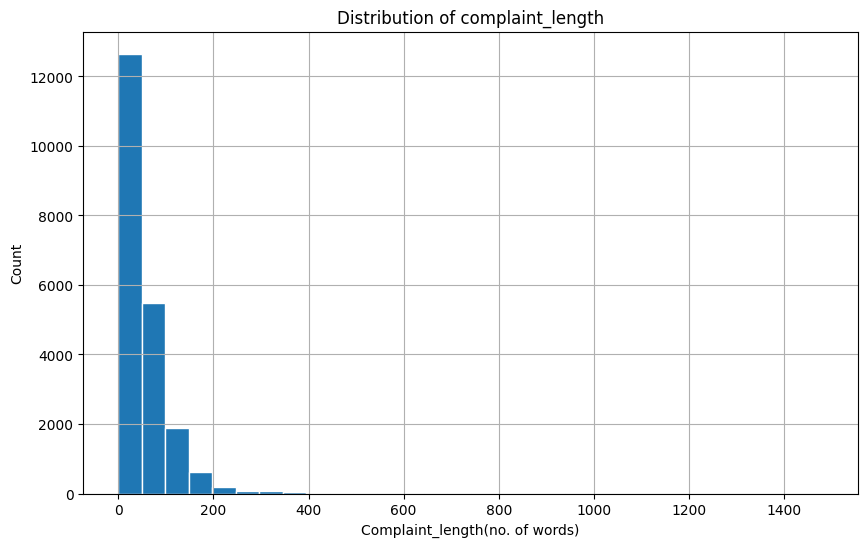

In [227]:
plt.figure(figsize=(10, 6))
plt.hist(df['words_count'], bins=30, edgecolor='white')
plt.xlabel('Complaint_length(no. of words)')
plt.ylabel('Count')
plt.title('Distribution of complaint_length')
plt.grid(True)

In [228]:
from wordcloud import WordCloud
wc= WordCloud(width=500, height=500, min_font_size=10, background_color='white', max_words =50)

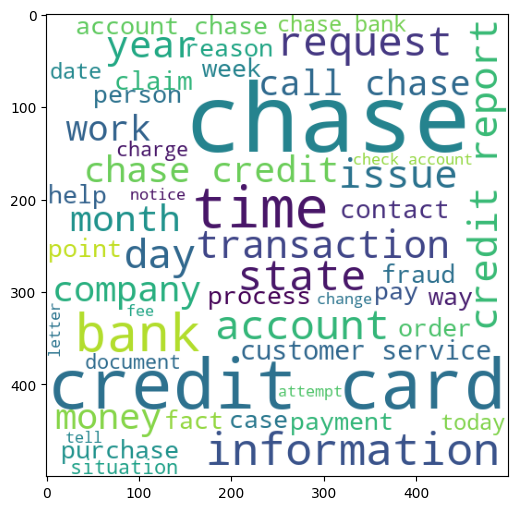

In [229]:
complaint_wc = wc.generate(df['complaint_clean'].str.cat(sep=' '))
plt.figure(figsize=(10, 6))
plt.imshow(complaint_wc)

In [230]:
# fiunction for analysing unigrams, bigrams, trigrams

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram_words(corpus, n=None,count=None):

    #count the frequency of the word that occurs
    vec = CountVectorizer(ngram_range=(n, n))     
    bag_of_words = vec.fit_transform(corpus)
    

    # Summing the occurrences of each word across all documents
    sum_words = bag_of_words.sum(axis=0) 

    #sum_words[0, idx]: accesses the element at index idx in the first row (0) of sum_words
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    #Sorting based on freq of words in descending order
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:count]

In [231]:
# unigram = get_top_ngram_words(df['complaint_clean'],1)
# def cc(unigram, word):
#     sum=0
#     count=0
#     for i in unigram:
#         sum+=i[1]
    
#     for i in unigram:
#         if i[0]==word:
#             count=i[1]
#     print(sum,count,count*100/sum)

# cc(unigram, "credit")

In [232]:
unigram = get_top_ngram_words(df['complaint_clean'],1,15)

In [233]:
for i in unigram:
    print(i)

('chase', 54629)
('account', 40622)
('credit', 33549)
('card', 29766)
('payment', 21072)
('bank', 16865)
('time', 15898)
('charge', 15413)
('day', 12849)
('call', 12403)
('money', 11768)
('check', 11246)
('report', 10401)
('loan', 10375)
('information', 9424)


In [234]:
bigram = get_top_ngram_words(df['complaint_clean'],2,15)
for i in bigram:
    print(i)

('credit card', 12774)
('credit report', 3871)
('chase credit', 3204)
('call chase', 2927)
('customer service', 2922)
('account chase', 2248)
('chase bank', 2201)
('check account', 2110)
('chase account', 2070)
('contact chase', 1910)
('debit card', 1905)
('credit score', 1696)
('account account', 1566)
('bank account', 1562)
('card account', 1552)


In [235]:
trigram = get_top_ngram_words(df['complaint_clean'],3,15)
for i in trigram:
    print(i)

('chase credit card', 2278)
('credit card account', 1063)
('credit card company', 967)
('credit card chase', 762)
('chase customer service', 571)
('inquiry credit report', 502)
('credit card credit', 467)
('charge credit card', 426)
('credit reporting agency', 380)
('account credit card', 357)
('card credit card', 352)
('call customer service', 350)
('credit report credit', 332)
('credit card charge', 304)
('credit card payment', 289)


# Feature Extraction

In [236]:
# converting textual data to numerical by vectorizing

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)   #will ignore texts which occurs more than 95% in all the complaints

In [237]:
tfidf = vectorizer.fit_transform(df['complaint_clean'])

In [238]:
tfidf.shape

(21072, 6150)

In [239]:
print(tfidf)

  (0, 3549)	0.253835283210846
  (0, 2612)	0.35618772043629565
  (0, 484)	0.2278058354618578
  (0, 893)	0.15472955573303648
  (0, 1447)	0.6047555721811274
  (0, 5937)	0.2841802231306047
  (0, 5268)	0.17227629828181173
  (0, 5902)	0.3204744877883878
  (0, 3294)	0.17713025045590589
  (0, 3542)	0.13958145890802903
  (0, 398)	0.19185435970758355
  (0, 2855)	0.1399971521680744
  (0, 1197)	0.19668445949816565
  (0, 66)	0.0896678163262695
  (1, 2855)	0.09426812673071028
  (1, 66)	0.060378493006505905
  (1, 785)	0.07040226234809814
  (1, 177)	0.47845947741279665
  (1, 5866)	0.5209403767182553
  (1, 260)	0.5582368189847321
  (1, 1422)	0.21645933733972414
  (1, 875)	0.26521593588788667
  (1, 3777)	0.12891634398251334
  (1, 1167)	0.19174781488528347
  (2, 893)	0.0849061050699907
  :	:
  (21070, 891)	0.16955059368672967
  (21071, 484)	0.08774245788905863
  (21071, 66)	0.20722053714016084
  (21071, 3777)	0.14748140005925428
  (21071, 4652)	0.10582822560461097
  (21071, 4987)	0.11427323931396145
  (2

### NMF-> Non-Negative Matrix Factorization 
will be using it for labelling our dataset

In [240]:
from sklearn.decomposition import NMF

In [241]:
nmf_model = NMF(n_components= 5, init='random', random_state=40)
W = nmf_model.fit_transform(tfidf)                #document-topic matrix
H = nmf_model.components_                         #topic-term matrix

C:\Users\HARSHIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [242]:
len(vectorizer.get_feature_names_out())

6150

In [243]:
# getting top 15 words from each topic

feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(H):
    print('Topic {}'.format(topic_idx))
    print([', '.join([feature_names[i] for i in topic.argsort()[:-21:-1]])])           #argsort() will be used to get index which will sort the array
    print()

Topic 0
['chase, dispute, card, claim, transaction, charge, call, letter, fraud, number, email, merchant, contact, phone, information, time, service, purchase, state, file']

Topic 1
['account, check, money, bank, deposit, fund, chase, branch, day, transfer, business, cash, call, number, reason, access, customer, checking, time, debit']

Topic 2
['payment, loan, mortgage, chase, month, modification, home, year, pay, time, interest, rate, property, foreclosure, date, statement, auto, day, refinance, request']

Topic 3
['credit, card, report, inquiry, account, score, chase, company, limit, debt, application, reporting, year, information, remove, identity, balance, history, reason, theft']

Topic 4
['charge, fee, balance, interest, card, overdraft, pay, statement, month, purchase, bill, rate, account, transaction, refund, transfer, dollar, year, payment, service']



In [244]:
# will assign the topic to each complaint based on max score
W.argmax(axis=1)

array([1, 0, 3, ..., 0, 2, 2], dtype=int64)

In [245]:
df.loc[:,'Label'] = W.argmax(axis=1)

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_2292\166067132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Label'] = W.argmax(axis=1)


In [246]:
df.head(3)

,complaint_id,complaint_clean,words_count,Label
1,3229299,morning help bank chase debt verification stat...,19,1
2,3199379,card agent upgrade anniversary date change age...,16,0
10,3233499,chase card report application submit identity ...,13,3


In [247]:
# print 5 complaints each of different label
df.groupby('Label').head(3).sort_values('Label')

,complaint_id,complaint_clean,words_count,Label
2,3199379,card agent upgrade anniversary date change age...,16,0
21,3226110,payment retailer chase pay website scam websi...,147,0
32,3236849,catering order place brother contact chase noo...,79,0
1,3229299,morning help bank chase debt verification stat...,19,1
14,3224980,son deposit chase account fund bank account pa...,27,1
17,3331023,account debit card branch customer service rep...,95,1
20,3352857,summer month experience income employment requ...,72,2
57,3198574,loan modification chase mo payment,5,2
58,3188608,payment minimum payment closing date statement...,44,2
10,3233499,chase card report application submit identity ...,13,3


In [248]:
# mapping Labels to topics

Topic_names = {
    4: 'others',
    2: 'Mortgage/Loan management',
    1: 'Bank Account services',
    3: 'Credit card / Prepaid card',
    0: 'Theft/Dispute Reporting'
}

df.loc[:,'Label']=df.loc[:,'Label'].map(Topic_names)

In [249]:
df.head()

,complaint_id,complaint_clean,words_count,Label
1,3229299,morning help bank chase debt verification stat...,19,Bank Account services
2,3199379,card agent upgrade anniversary date change age...,16,Theft/Dispute Reporting
10,3233499,chase card report application submit identity ...,13,Credit card / Prepaid card
11,3180294,book offer ticket reward card information minu...,50,Credit card / Prepaid card
14,3224980,son deposit chase account fund bank account pa...,27,Bank Account services


In [250]:
df['complaint_clean'].iloc[0]

'morning help bank chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help'

In [251]:
df['Label'].value_counts()

Label
Mortgage/Loan management      5033
Theft/Dispute Reporting       4892
Bank Account services         4726
Credit card / Prepaid card    4043
others                        2378
Name: count, dtype: int64

In [252]:
df.shape

(21072, 4)

In [253]:
df = df[['complaint_id', 'complaint_clean','Label']]

In [254]:
df

,complaint_id,complaint_clean,Label
1,3229299,morning help bank chase debt verification stat...,Bank Account services
2,3199379,card agent upgrade anniversary date change age...,Theft/Dispute Reporting
10,3233499,chase card report application submit identity ...,Credit card / Prepaid card
11,3180294,book offer ticket reward card information minu...,Credit card / Prepaid card
14,3224980,son deposit chase account fund bank account pa...,Bank Account services
...,...,...,...
78303,3094545,chase card customer decade solicitation credit...,Credit card / Prepaid card
78309,3091984,credit card provider ask claim purchase protec...,Theft/Dispute Reporting
78310,3133355,risk consumer chase year trust mobile banking...,Theft/Dispute Reporting
78311,3110963,credit yrs chase credit card chase freedom pro...,Mortgage/Loan management


In [255]:
df.to_csv('smth.csv',index=False)